In [654]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as f
from torch.utils.data import Dataset, DataLoader
import torchvision
from torch.optim import SGD
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

In [507]:
x,y = torch.load('data/training.pt')

Text(0.5, 1.0, 'Number:  5')

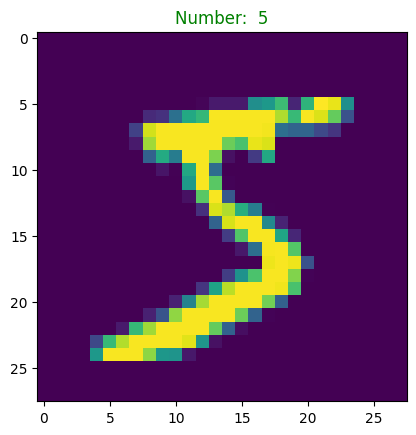

In [508]:
plt.imshow(x[0].numpy())
plt.title(f'Number:  {y[0].numpy()}')

In [509]:
x.shape, y.shape #60000 all of them being 28*28 pixels the y tensor is just 60000 in size each corrosponding to a image

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [510]:
print(f'{y[0].numpy()}')

5


In [511]:
y_new = f.one_hot(y,num_classes=10)

In [512]:
x.view(-1,28**2).shape   #Turn the 28*28 into a vector lenght 28*28 = 28**2

torch.Size([60000, 784])

In [513]:
class Dset(Dataset):
    def __init__(self,filepath):
        self.x,self.y = torch.load(filepath)
        self.x = self.x / 255 #Normalize
        self.y = f.one_hot(self.y,num_classes = 10).to(float) 
        
    def __len__(self):
        return self.x.shape[0]
        
    def __getitem__(self,ix):
        return self.x[ix],self.y[ix]

In [514]:
train_path = 'data/training.pt'
test_path = 'data/test.pt'

In [515]:
trainset = Dset(train_path)
testset = Dset(test_path)

In [516]:
traindl = DataLoader(trainset,batch_size = 32)
testdl = DataLoader(testset,batch_size = 32)

In [517]:
for x,y in traindl:
    print(x.shape)  #32 Images that are 28 by 28
    print(y.shape)  #32 Images with 10 Classes assigned to them
    break

torch.Size([32, 28, 28])
torch.Size([32, 10])


In [518]:
len(traindl) #the lenght of the traindl is the number of batches available

1875

In [708]:
Loss = nn.CrossEntropyLoss()

In [709]:
class NNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.Matrix1 = nn.Linear(28**2, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.Matrix2 = nn.Linear(100, 50)
        self.bn2 = nn.BatchNorm1d(50)
        self.Matrix3 = nn.Linear(50, 10)
        
        self.dropout = nn.Dropout(0.5)
        self.R = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.dropout(self.R(self.bn1(self.Matrix1(x))))
        x = self.dropout(self.R(self.bn2(self.Matrix2(x))))
        x = self.Matrix3(x)
        return x.squeeze()

In [710]:
N = NNetwork()

In [711]:
N(trainset.x[0:2]) , trainset.y[0:2] #in the end of the training the top should be the same as the bottom

(tensor([[ 0.2641, -0.2149,  0.3599,  0.2610,  0.7805,  1.0698, -0.2999, -0.4155,
          -0.0073, -0.8445],
         [ 0.2716, -0.0904,  0.7298,  1.3653,  0.0243, -0.7138,  0.5443, -0.0403,
           0.8176,  1.3140]], grad_fn=<SqueezeBackward0>),
 tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64))

In [712]:
Loss(N(trainset.x[0:2]),trainset.y[0:2])

tensor(2.6690, dtype=torch.float64, grad_fn=<DivBackward1>)

In [718]:
import torch.nn as nn
import torch.optim as optim
import numpy as np

def train(traindl, Network, numberofepochs=20):
    
    # Using Adam optimizer
    opt = optim.Adam(Network.parameters(), lr=0.001)
    Loss = nn.CrossEntropyLoss()

    losses = []
    epochs = []

    for epoch in range(numberofepochs):
        print(f'Epoch {epoch}')
        batchnum = len(traindl)
        for i, (x, y) in enumerate(traindl):
            opt.zero_grad()
            loss_value = Loss(Network(x), y)
            loss_value.backward()
            opt.step()

            epochs.append(epoch + i / batchnum)
            losses.append(loss_value.item())

    return np.array(epochs), np.array(losses)


In [720]:
"""def train(traindl,Network,numberofepochs = 20):
    
    opt = SGD(Network.parameters(), lr=0.1)
    Loss = nn.CrossEntropyLoss()

    losses = []
    epochs = []

    for epoch in range(numberofepochs):
        print(f'Epoch {epoch}')
        batchnum = len(traindl)
        for i,(x,y) in enumerate(traindl):
            opt.zero_grad()
            loss_value = Loss(N(x),y)
            loss_value.backward()
            opt.step()

            epochs.append(epoch+i/batchnum)
            losses.append(loss_value.item())

    return np.array(epochs), np.array(losses)""" #SGD Training

"def train(traindl,Network,numberofepochs = 20):\n    \n    opt = SGD(Network.parameters(), lr=0.1)\n    Loss = nn.CrossEntropyLoss()\n\n    losses = []\n    epochs = []\n\n    for epoch in range(numberofepochs):\n        print(f'Epoch {epoch}')\n        batchnum = len(traindl)\n        for i,(x,y) in enumerate(traindl):\n            opt.zero_grad()\n            loss_value = Loss(N(x),y)\n            loss_value.backward()\n            opt.step()\n\n            epochs.append(epoch+i/batchnum)\n            losses.append(loss_value.item())\n\n    return np.array(epochs), np.array(losses)"

In [715]:
epoch_data,loss_data = train(traindl,N)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [721]:
avg_epoch_data = epoch_data.reshape(20,-1).mean(axis = 1)
avg_loss_data = loss_data.reshape(20,-1).mean(axis = 1)

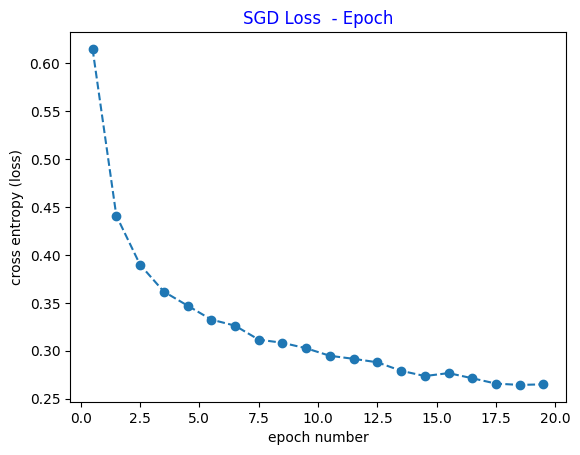

In [722]:
plt.plot(avg_epoch_data,avg_loss_data,'o--')
plt.title("SGD Loss  - Epoch")
plt.xlabel('epoch number')
plt.ylabel('cross entropy (loss)')
plt.savefig('SGD.png')

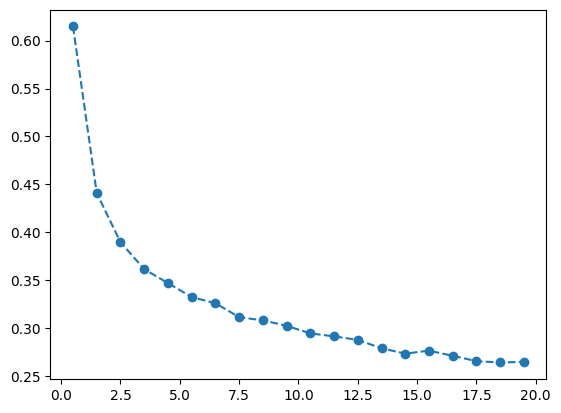

In [723]:
plt.plot(avg_epoch_data,avg_loss_data,'o--')

In [681]:
plt.savefig('SGD.png')

<Figure size 640x480 with 0 Axes>

In [682]:
x_sample = trainset[0][0]
ywhat = N(x_sample)
ywhat

tensor([-91.4966, -27.1362, -25.6114,  52.9811, -77.6727,  78.8669, -58.3745,
        -11.8405, -27.0904,  10.3932], grad_fn=<SqueezeBackward0>)

In [683]:
torch.argmax(ywhat)

tensor(5)

In [684]:
xtest , ytest = testset[:10000]
ywhat = N(xtest).argmax(axis=1)

In [685]:
ywhat[1] == ytest[1].argmax()

tensor(True)

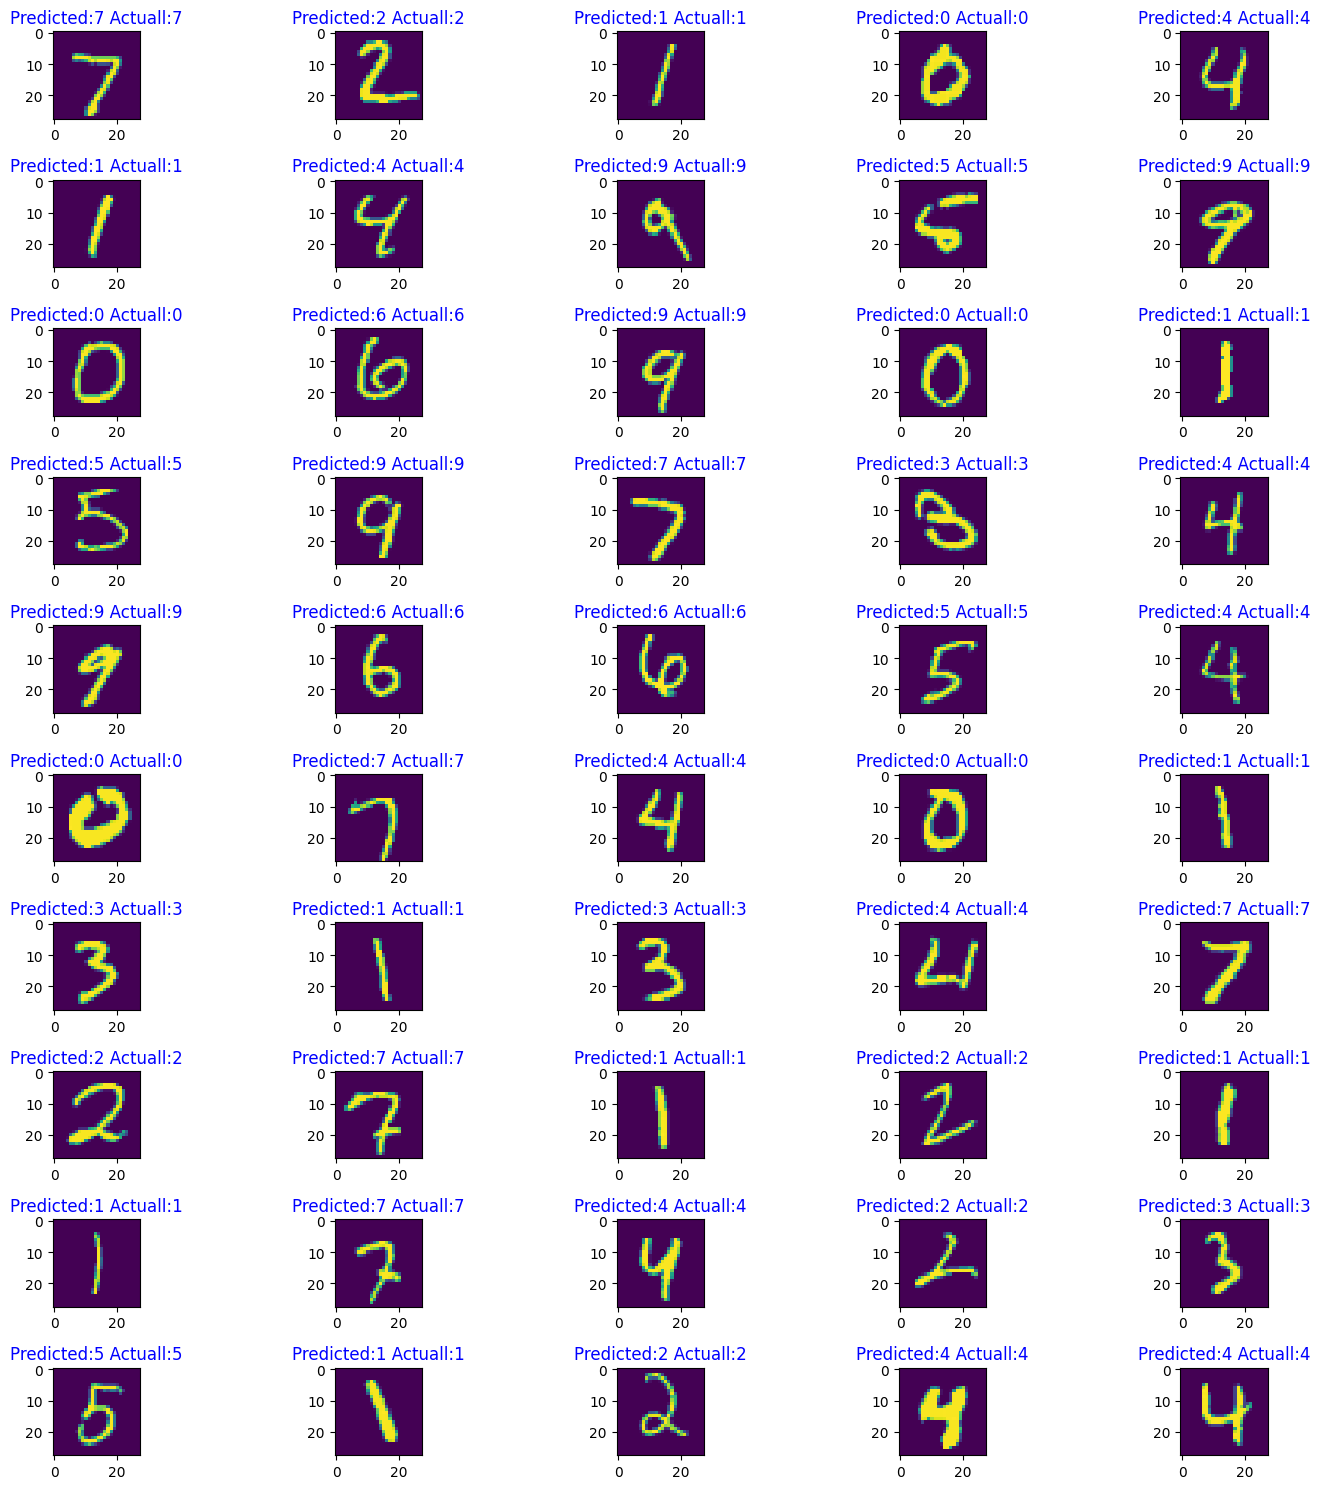

In [666]:
fig, ax = plt.subplots(10,5,figsize = (15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(xtest[i])
    if (ywhat[i] == ytest[i].argmax()):
        plt.rcParams.update({'text.color': "blue"})
        plt.title(f'Predicted:{ywhat[i]} Actuall:{np.argmax(ytest[i])}')
    else:
        plt.rcParams.update({'text.color': "red"})
        plt.title(f'Predicted:{ywhat[i]} Actuall:{np.argmax(ytest[i])}')
        
    

        
fig.tight_layout()

In [667]:
torch.save(N.state_dict(), 'MNIST3ADAM.pth')

In [724]:
ywhat.shape

torch.Size([10000])

In [725]:
def accuracycalc():
    correct = 0 
    N.eval()

    with torch.no_grad():

        for i in range(10000):
            if (ywhat[i] == ytest[i].argmax()):
                correct+=1


    print(correct/10000*100)    

In [726]:
accuracycalc()

97.67
